# Transducing Language Models

In [1]:
%load_ext autoreload
%autoreload 2

In [5]:
from transduction import FST, FSA, EPSILON, PrecoverDecomp, examples, Precover
from transduction.enumeration import prioritized_enumeration
from transduction.util import display_table

from tokenization.util import logsumexp, Chart

Notes

* I would favor moving to a general "prioritize however you see fit" design rather than hardcoding the LM prefix probability as the only design.

* For example, it may be possible to view trimming (or approximate trimming from co-accessibility in a coarse-grained precover) as a kind of priorization heuristic.
  
* I would prefer to defer rather than prune so that we have good methods for recovering from dead ends.

* I like to think of the enumeration algorithm as a prioritized materialization for the cross-production construction of the LM and the FST.  In the case of a neural language model, the LM's state space is the infinitely large and degenerate space of string prefixes.  We can contrast that with the case of a PFsA, where states come from a finite set.  How about PCFGs?  (The Bar-Hillel construction creates states of the form `(i,X,j)` where `i` and `j` are states of the automaton and `X` is a nonterminal in the PCFG.  It seems a little different that we triplets rather than pairs, but maybe there is an elegant way to reconcile this.) 

* It would be really nice if our enumeration method recovered exact algorithms when run on models with finitely many states (e.g., PCFG language models).

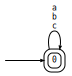

In [6]:
fst = examples.replace([('a', 'a'), ('b', 'b'), ('c', 'c')])
fst

In [7]:
from genparse import EarleyLM, EOS

In [8]:
lm = EarleyLM.from_string("""

.5: S -> a S
.4: S -> b S
.1: S -> c

""")
lm.logp_next = lambda x: Chart(float('-inf'), lm.p_next(x)).map_values(np.log)

In [9]:
prioritized_enumeration(lm, fst, 'abc', max_steps=50)

/home/timv/projects/tokenization/tokenization/util.py:323: RuntimeWarning: invalid value encountered in log
  return Chart(f(self.zero), [(k, f(v)) for k, v in self.items()])


([Item(-3.912, {(0, 'abc')}, 'abc')], [])

In [10]:
prioritized_enumeration(lm, fst, 'aa', max_steps=100)

/home/timv/projects/tokenization/tokenization/util.py:323: RuntimeWarning: invalid value encountered in log
  return Chart(f(self.zero), [(k, f(v)) for k, v in self.items()])


([Item(-1.386, {(0, 'aa')}, 'aa')], [])